# Layer 4 project. Mice ages

In [1]:
# Prepare

%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib

def sns_styleset():
    sns.set_context('paper')
    sns.set_style('ticks')
    matplotlib.rcParams['axes.linewidth']    = .75
    matplotlib.rcParams['xtick.major.width'] = .75
    matplotlib.rcParams['ytick.major.width'] = .75
    matplotlib.rcParams['xtick.major.size'] = 3
    matplotlib.rcParams['ytick.major.size'] = 3
    matplotlib.rcParams['font.size']       = 7
    matplotlib.rcParams['axes.titlesize']  = 7
    matplotlib.rcParams['axes.labelsize']  = 7
    matplotlib.rcParams['legend.fontsize'] = 7
    matplotlib.rcParams['xtick.labelsize'] = 7
    matplotlib.rcParams['ytick.labelsize'] = 7
    
sns_styleset()

In [2]:
d1 = pd.read_excel('../../BICCN patch-seq data/L4/Layer 4 mice.xlsx',
             sheet_name='V1').values[1:,[3,6]]
d1 = np.concatenate(([['V1']]*d1.shape[0], d1), axis=1)

d2 = pd.read_excel('../../BICCN patch-seq data/L4/Layer 4 mice.xlsx',
             sheet_name='S1').values[1:,[3,6]]
d2[:,0] = [d+' S1' for d in d2[:,0]]
d2 = np.concatenate(([['S1']]*d2.shape[0], d2), axis=1)

d3 = pd.read_excel('../../BICCN patch-seq data/L4/Layer 4 mice.xlsx',
             sheet_name='Pups').values[1:,[3,6]]
d3[:5,0] = [d+' p30' for d in d3[:5,0]]
d3[5:,0] = [d+' p15' for d in d3[5:,0]]
d3 = np.concatenate(([['Pups']]*d3.shape[0], d3), axis=1)

d4 = pd.read_excel('../../BICCN patch-seq data/L4/Layer 4 mice.xlsx',
             sheet_name='Intrabarrel').values[1:,[3,6]]
d4[:,0] = [d+' S1 intra-barrel' for d in d4[:,0]]
d4 = np.concatenate(([['Intra-barrel']]*d4.shape[0], d4), axis=1)

d5 = pd.read_excel('../../BICCN patch-seq data/L4/Layer 4 mice.xlsx',
             sheet_name='SST patch seq').values[1:,[3,6]]
d5[:,0] = [d+' patch-seq' for d in d5[:,0]]
d5 = np.concatenate(([['Patch-seq']]*d5.shape[0], d5), axis=1)

mice_ages = np.concatenate((d1,d2,d3,d4,d5))

<IPython.core.display.Javascript object>


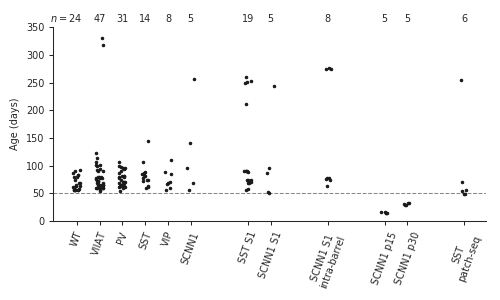

[ 55  62  71  85 330] 129
[ 50  63  72  88 330] 153
177


In [3]:
sns_styleset()
plt.figure(figsize=(5,3))

types = ['WT', 'VIIAT', 'PV', 'SST', 'VIP', 'SCNN1',
         'SST S1', 'SCNN1 S1', 
         'SCNN1 S1 intra-barrel',
         'SCNN1 p15', 'SCNN1 p30',
         'SST patch-seq']
xpos = np.arange(len(types), dtype='float')
xpos[6:] += 1.5
xpos[8:] += 1.5
xpos[9:] += 1.5
xpos[11:] += 1.5

np.random.seed(42)
for i,t in enumerate(types):
    plt.scatter(xpos[i] + (np.random.uniform(size=np.sum(mice_ages[:,1]==t))-.5)/3, 
                mice_ages[mice_ages[:,1]==t, 2], s=3, color='k')
    
    if i==0:
        plt.text(xpos[i]-.5, 360, r'$n={}$'.format(np.sum(mice_ages[:,1]==t)), ha='center', fontsize=7)
    else:
        plt.text(xpos[i], 360, np.sum(mice_ages[:,1]==t), ha='center', fontsize=7)
    
types[8] = 'SCNN1 S1\nintra-barrel'
types[11] = 'SST\npatch-seq'
plt.xticks(xpos, labels=types, rotation=70)
plt.ylabel('Age (days)')
plt.ylim([0,350])
xl = plt.xlim()
plt.plot(xl, [50,50], '--', linewidth=.75, zorder=-1, color='#888888')
plt.xlim(xl)
sns.despine()
plt.tight_layout()
plt.savefig('figures/ages.png', dpi=150)

print(np.percentile(mice_ages[mice_ages[:,0]=='V1', 2], 
                    [0,25,50,75,100]).astype(int), np.sum(mice_ages[:,0]=='V1'))

print(np.percentile(mice_ages[np.isin(mice_ages[:,0], ['V1', 'S1']), 2], 
                    [0,25,50,75,100]).astype(int), np.sum(np.isin(mice_ages[:,0], ['V1', 'S1'])))

print(mice_ages.shape[0])